In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [2]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

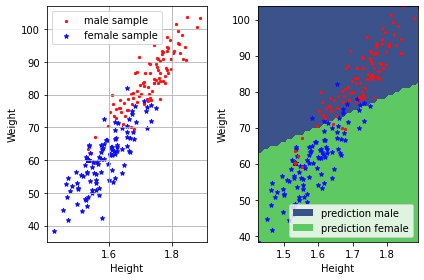

In [3]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # classify the data by linear regression:
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    # w = least squares with respect to tx and y
    _, w = least_squares(y, tx)
    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute negative log likelihood loss.

In [4]:
def sigmoid(t):
    """apply the sigmoid function on t."""
    return 1 / (1 + np.exp(-t))

In [5]:
def calculate_loss(y, tx, w):
    """compute the loss: negative log likelihood."""
    s = sigmoid(tx @ w)
    return -(y.T @ np.log(s) + (1 - y).T @ np.log(1 - s))

In [6]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    s = sigmoid(tx @ w)
    return tx.T @ (s - y)

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [7]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression.
    Return the loss and the updated w.
    """
    # compute the loss:
    loss = calculate_loss(y, tx, w)
    # compute the gradient:
    grad = calculate_gradient(y, tx, w)
    # update w:
    w = w - gamma * grad
    return loss, w

Demo!

Current iteration=0, loss=[[138.62943611]]
Current iteration=100, loss=[[43.46403231]]
Current iteration=200, loss=[[41.54589281]]
Current iteration=300, loss=[[41.09863897]]
Current iteration=400, loss=[[40.96487064]]
Current iteration=500, loss=[[40.92008946]]
Current iteration=600, loss=[[40.90418744]]
Current iteration=700, loss=[[40.89834995]]
Current iteration=800, loss=[[40.89616497]]
Current iteration=900, loss=[[40.89533753]]
Current iteration=1000, loss=[[40.89502196]]
Current iteration=1100, loss=[[40.89490109]]
Current iteration=1200, loss=[[40.89485466]]
Current iteration=1300, loss=[[40.8948368]]
Current iteration=1400, loss=[[40.89482992]]
Current iteration=1500, loss=[[40.89482727]]
loss=[[40.89482664]]


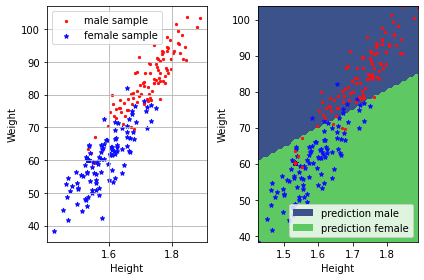

In [8]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent", True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your Hessian below

In [9]:
def calculate_hessian(y, tx, w):
    """return the Hessian of the loss function."""
    s = sigmoid(tx.dot(w))
    s = np.diag(s.T[0])
    r = np.multiply(s, (1 - s))
    return tx.T @ r @ tx

tx = np.c_[np.ones((y.shape[0], 1)), x]
w = np.zeros((tx.shape[1], 1))
calculate_hessian(y, tx, w)

array([[ 5.00000000e+01, -7.79376563e-14,  7.69384556e-14],
       [-7.79376563e-14,  5.00000000e+01,  4.60676209e+01],
       [ 7.69384556e-14,  4.60676209e+01,  5.00000000e+01]])

Write a function below to return loss, gradient, and Hessian.

In [10]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and Hessian."""
    loss = calculate_loss(y, tx, w)
    grad = calculate_gradient(y, tx, w)
    hess = calculate_hessian(y, tx, w)
    return loss, grad, hess

### Using Newton's method
Use Newton's method for logistic regression.

In [11]:
def learning_by_newton_method(y, tx, w, gamma):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    # return loss, gradient and Hessian:
    loss, grad, hess = logistic_regression(y, tx, w)
    # update w:
    w = w - gamma * np.linalg.solve(hess, grad)
    return loss, w

demo

Current iteration=0, the loss=[[138.62943611]]
Current iteration=1, the loss=[[63.41155374]]
Current iteration=2, the loss=[[47.3045862]]
Current iteration=3, the loss=[[41.99746742]]
Current iteration=4, the loss=[[40.95639864]]
Current iteration=5, the loss=[[40.89511994]]
Current iteration=6, the loss=[[40.89482562]]
Current iteration=7, the loss=[[40.89482561]]
loss=[[40.89482561]]


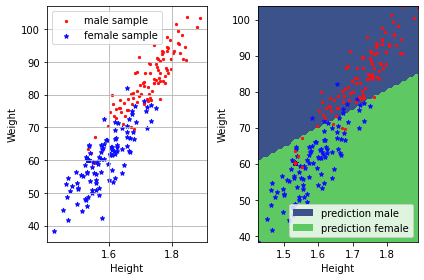

In [12]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    gamma = 1.
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, gamma)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method", True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression (first-order, no Newton)
Fill in the function below.

In [13]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient"""
    w_norm = np.linalg.norm(w)
    loss = calculate_loss(y, tx, w) + lambda_ * w_norm**2
    grad = calculate_gradient(y, tx, w) + 2 * lambda_ * w_norm
    return loss, grad

In [14]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    # return loss, gradient:
    loss, grad = penalized_logistic_regression(y, tx, w, lambda_)
    # update w:
    w = w - gamma * grad
    return loss, w

Current iteration=0, loss=[[138.62943611]]
Current iteration=100, loss=[[45.70923225]]
Current iteration=200, loss=[[45.45324451]]
Current iteration=300, loss=[[46.2423058]]
Current iteration=400, loss=[[47.04076198]]
Current iteration=500, loss=[[47.71028055]]
Current iteration=600, loss=[[48.24761713]]
Current iteration=700, loss=[[48.67332154]]
Current iteration=800, loss=[[49.00938914]]
Current iteration=900, loss=[[49.27461687]]
Current iteration=1000, loss=[[49.48411505]]
Current iteration=1100, loss=[[49.64978878]]
Current iteration=1200, loss=[[49.78096131]]
Current iteration=1300, loss=[[49.88492917]]
Current iteration=1400, loss=[[49.96741089]]
Current iteration=1500, loss=[[50.03289768]]
Current iteration=1600, loss=[[50.0849246]]
Current iteration=1700, loss=[[50.12627978]]
Current iteration=1800, loss=[[50.15916617]]
Current iteration=1900, loss=[[50.18532701]]
Current iteration=2000, loss=[[50.20614346]]
Current iteration=2100, loss=[[50.22271101]]
Current iteration=2200,

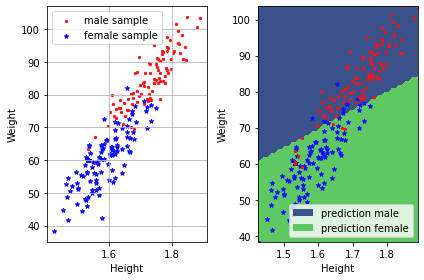

In [15]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent",True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)